# End-to-End Data Cleaning Pipeline with Raha and Baran (Minimal and Integrated)
We build an end-to-end data cleaning pipeline with our configuration-free error detection and correction systems, Raha and Baran.

In [1]:
import pandas
import IPython.display
import ipywidgets

import raha

## 1. Instantiating the Detection and Correction Classes
We first instantiate the `Detection` and `Correction` classes.

In [2]:
from raha import analysis_utilities
app_1 = raha.Detection()
app_2 = raha.Correction()

# How many tuples would you label?
app_1.LABELING_BUDGET = 20
app_2.LABELING_BUDGET = 0

# Would you like to see the logs?
app_1.VERBOSE = True
app_2.VERBOSE = True

## 2. Instantiating the Dataset
We next load and instantiate the dataset object.

In [3]:
dataset_dictionary = {
        "name": "beers",
        "path": "datasets/beers/dirty.csv",
        "clean_path": "datasets/beers/clean.csv"
    }
d = app_1.initialize_dataset(dataset_dictionary)
d.dataframe.head()

,index,id,beer_name,style,ounces,abv,ibu,brewery_id,brewery_name,city,state
0,1,1436,Pub Beer,American Pale Lager,12.0 oz,0.05,N/A,408,10 Barrel Brewing Company,Bend,OR
1,2,2265,Devil's Cup,American Pale Ale (APA),12.0 oz.,0.066,N/A,177,18th Street Brewery,Gary,IN
2,3,2264,Rise of the Phoenix,American IPA,12.0 ounce,0.071,N/A,177,18th Street Brewery,Gary,IN
3,4,2263,Sinister,American Double / Imperial IPA,12.0 oz,0.09%,N/A,177,18th Street Brewery,Gary,IN
4,5,2262,Sex and Candy,American IPA,12.0 OZ.,0.075,N/A,177,18th Street Brewery,Gary,IN


## 3. Generating Features and Clusters
Raha runs (all or the promising) error detection strategies on the dataset. This step could take a while because all the strategies should be run on the dataset. Raha then generates a feature vector for each data cell based on the output of error detection strategies. Raha next builds a hierarchical clustering model for our clustering-based sampling approach.

In [4]:
app_1.run_strategies(d)
app_1.generate_features(d)
app_1.build_clusters(d)

I just load strategies' results as they have already been run on the dataset!


511 strategy profiles are collected.
44 Features are generated for column 0.
44 Features are generated for column 1.
133 Features are generated for column 2.
100 Features are generated for column 3.
63 Features are generated for column 4.
54 Features are generated for column 5.
54 Features are generated for column 6.
55 Features are generated for column 7.
103 Features are generated for column 8.
106 Features are generated for column 9.
75 Features are generated for column 10.
A hierarchical clustering model is built for column 0.
A hierarchical clustering model is built for column 1.
A hierarchical clustering model is built for column 2.
A hierarchical clustering model is built for column 3.
A hierarchical clustering model is built for column 4.
A hierarchical clustering model is built for column 5.
A hierarchical clustering model is built for column 6.
A hierarchical clustering model is built for column 7.
A hierarchical clustering model is built for column 8.
A hierarchical clusteri

## 4. Interactive Tuple Sampling and Labeling
Raha then iteratively samples a tuple. We should label data cells of each sampled tuple.

In [5]:
# def on_button_clicked(_):
#     for j in range(0, len(texts)):
#         cell = (d.sampled_tuple, j)
#         error_label = 0
#         correction = texts[j].value
#         if d.dataframe.iloc[cell] != correction:
#             error_label = 1
#         d.labeled_cells[cell] = [error_label, correction]
#     d.labeled_tuples[d.sampled_tuple] = 1
#
# app_1.sample_tuple(d)
# print("Fix the dirty cells in the following sampled tuple.")
# sampled_tuple = pandas.DataFrame(data=[d.dataframe.iloc[d.sampled_tuple, :]], columns=d.dataframe.columns)
# IPython.display.display(sampled_tuple)
# texts = [ipywidgets.Text(value=d.dataframe.iloc[d.sampled_tuple, j]) for j in range(d.dataframe.shape[1])]
# button = ipywidgets.Button(description="Save the Annotation")
# button.on_click(on_button_clicked)
# output = ipywidgets.VBox(children=texts + [button])
# IPython.display.display(output)

For the sake of time, we use the ground truth of the dataset to label tuples below.

In [6]:
%%capture
while len(d.labeled_tuples) < app_1.LABELING_BUDGET:
    app_1.sample_tuple(d)
    if d.has_ground_truth:
        app_1.label_with_ground_truth(d)

## 5. Propagating User Labels and Predicting the Labels
Raha then propagates each user label through its cluster. Raha then trains and applies one classifier per data column to predict the label of the rest of data cells.

In [7]:
app_1.propagate_labels(d)
app_1.predict_labels(d)

The number of labeled data cells increased from 220 to 24250.
A classifier is trained and applied on column 0.
A classifier is trained and applied on column 1.
A classifier is trained and applied on column 2.
A classifier is trained and applied on column 3.
A classifier is trained and applied on column 4.
A classifier is trained and applied on column 5.
A classifier is trained and applied on column 6.
A classifier is trained and applied on column 7.
A classifier is trained and applied on column 8.
A classifier is trained and applied on column 9.
A classifier is trained and applied on column 10.


## 6. Initializing and Updating the Error Corrector Models
Baran initializes the error corrector models. Baran then iteratively samples a tuple. We should label data cells of each sampled tuple. It then udpates the models accordingly and generates a feature vector for each pair of a data error and a correction candidate. Finally, it trains and applies a classifier to each data column to predict the final correction of each data error. Since we already labeled tuples for Raha, we use the same labeled tuples and do not label new tuples here.

In [8]:
app_2.initialize_models(d)
app_2.initialize_dataset(d)
for si in d.labeled_tuples:
    d.sampled_tuple = si
    app_2.update_models(d)
    app_2.generate_features(d)
    app_2.predict_corrections(d)

The error corrector models are initialized.
The error corrector models are updated with new labeled tuple 1243.
201651 pairs of (a data error, a potential correction) are featurized.
Prediction Method in this step:
    Column 4: Train
    Column 5: Train
    Column 6: Train
    Column 9: Train
    Column 10: Train
Train sizes in this step:
    Column 4: 22
    Column 5: 483
    Column 6: 688
    Column 9: 754
    Column 10: 102
Corrections identified in this step:
    Column 4: 2390 Mean correction confidence: 0.6145335752757046
    Column 5: 604 Mean correction confidence: 0.5402724589003406
    Column 6: 997 Mean correction confidence: 0.9999999999999998
    Column 9: 120 Mean correction confidence: 0.9999999999999999
    Column 10: 151 Mean correction confidence: 0.7871224937909238
Corrections applied in this step:
    Column 4: 2390 Real changes: 0
    Column 5: 485 Real changes: 101
    Column 6: 997 Real changes: 0
    Column 9: 120 Real changes: 0
    Column 10: 127 Real changes

## 7. Storing Results
Both Raha and Baran can also store the error detection/correction results.

In [9]:
app_1.store_results(d)
app_2.store_results(d)

The results are stored in datasets/beers/raha-baran-results-beers/error-detection/detection.dataset.
The results are stored in datasets/beers/raha-baran-results-beers/error-correction/correction.dataset.


## 8. Evaluating the Data Cleaning Task
We can finally evaluate our data cleaning task.

In [10]:
edp, edr, edf = d.get_data_cleaning_evaluation(d.detected_cells)[:3]
ecp, ecr, ecf = d.get_data_cleaning_evaluation(d.corrected_cells)[-3:]

evaluation_df = pandas.DataFrame(columns=["Task", "Precision", "Recall", "F1 Score"])
evaluation_df = evaluation_df.append({"Task": "Error Detection (Raha)", "Precision": "{:.2f}".format(edp), 
                                      "Recall": "{:.2f}".format(edr), "F1 Score": "{:.2f}".format(edf)}, ignore_index=True)
evaluation_df = evaluation_df.append({"Task": "Error Correction (Baran)", "Precision": "{:.2f}".format(ecp), 
                                      "Recall": "{:.2f}".format(ecr), "F1 Score": "{:.2f}".format(ecf)}, ignore_index=True)
evaluation_df.head()

/home/adrian/source/MA/raha/raha/dataset.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if correction_dictionary[cell] == actual_errors[cell]:


,Task,Precision,Recall,F1 Score
0,Error Detection (Raha),0.98,1.00,0.99
1,Error Correction (Baran),0.97,0.96,0.96


In [11]:
actual_errors = d.get_actual_errors_dictionary()

Histograms of the probabilities of the detection algorithm by (label, true label)


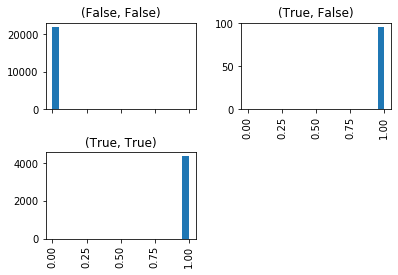

In [12]:
analysis_utilities.detection_evaluation(d, actual_errors)

In [13]:
correction_confidence_df = analysis_utilities.get_correction_confidence_df(d, actual_errors)

Distribution of confidences for wrong (False) and correct (True) corrections:


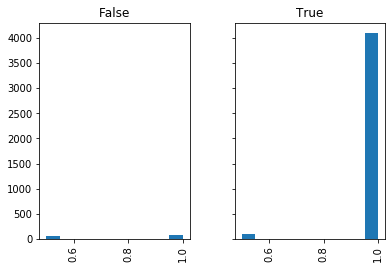

In [14]:
analysis_utilities.correction_confidence_distributions(correction_confidence_df)

Empirical probability of a correction being wrong given its confidence:


/home/adrian/anaconda3/envs/raha/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


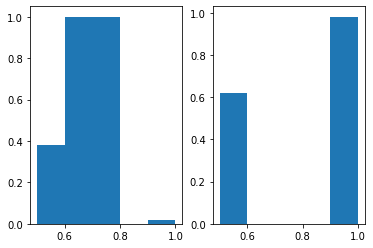

In [15]:
f = analysis_utilities.correction_correctness_by_confidence(correction_confidence_df)
f.show()